# WEEK 04
# Encounter 04 - Linear Regression
# Project Challenge

## Task Description

Perform the following tasks on this week’s bikes dataset:

   1. Load the data in a pandas dataframe
   2. Set the datetime column as the dataframe index
   3. Subset the dataframe to extract the following columns: temp, atemp, humidity, windspeed and count
   4. Generate a heatmap of the subset dataframe. Which of the features has the highest correlation with the count column ?
   5. Using that feature from step. 4, build a simple linear regression model with count as the response variable. Calculate R2.
   6. Add an additional feature from the subset dataframe and repeat step 5. Observe how the value R2 changed. How can this change be explained ?
   7. Add the remaining two features and repeat step 6. Does the model get better when atemp is added as a feature ? why ?
   8. What additional features can be added to improve the fit of the model ?

**BONUS**

   9. Use features that were extracted and binned in the datetime lesson to improve the r²r² score even further.


In [2]:
import statsmodels.formula.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 1. Load the data in a pandas dataframe
# 2. Set the datetime column as the dataframe index

bikes = pd.read_csv('../data/bikes_with_bins.csv', index_col='datetime', parse_dates=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month_name,day_of_week,year,part_of_day
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,0,January,Saturday,2011,night
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,1,January,Saturday,2011,night
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2,January,Saturday,2011,night
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,3,January,Saturday,2011,night
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,4,January,Saturday,2011,night


In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       17379 non-null  int64  
 1   holiday      17379 non-null  int64  
 2   workingday   17379 non-null  int64  
 3   weather      17379 non-null  int64  
 4   temp         17379 non-null  float64
 5   atemp        17379 non-null  float64
 6   humidity     17379 non-null  int64  
 7   windspeed    17379 non-null  float64
 8   casual       10886 non-null  float64
 9   registered   10886 non-null  float64
 10  count        17379 non-null  int64  
 11  hour         17379 non-null  int64  
 12  month_name   17379 non-null  object 
 13  day_of_week  17379 non-null  object 
 14  year         17379 non-null  int64  
 15  part_of_day  17379 non-null  object 
dtypes: float64(5), int64(8), object(3)
memory usage: 2.3+ MB


In [5]:
# 3. Subset the dataframe to extract the following columns: temp, atemp, humidity, windspeed and count
bikes_weather = bikes[['temp', 'atemp', 'humidity', 'windspeed', 'count']]
bikes_weather.head()

,temp,atemp,humidity,windspeed,count
datetime,,,,,
2011-01-01 00:00:00,9.84,14.395,81,0.0,16
2011-01-01 01:00:00,9.02,13.635,80,0.0,40
2011-01-01 02:00:00,9.02,13.635,80,0.0,32
2011-01-01 03:00:00,9.84,14.395,75,0.0,13
2011-01-01 04:00:00,9.84,14.395,75,0.0,1


In [6]:
bikes_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       17379 non-null  float64
 1   atemp      17379 non-null  float64
 2   humidity   17379 non-null  int64  
 3   windspeed  17379 non-null  float64
 4   count      17379 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 814.6 KB


### 4. Generate a heatmap of the subset dataframe. Which of the features has the highest correlation with the count column ?

In [8]:
bikes_weather.corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.987672,-0.069881,-0.023125,0.414713
atemp,0.987672,1.000000,-0.051918,-0.062336,0.411854
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.329615
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.099909
count,0.414713,0.411854,-0.329615,0.099909,1.000000


<AxesSubplot: >

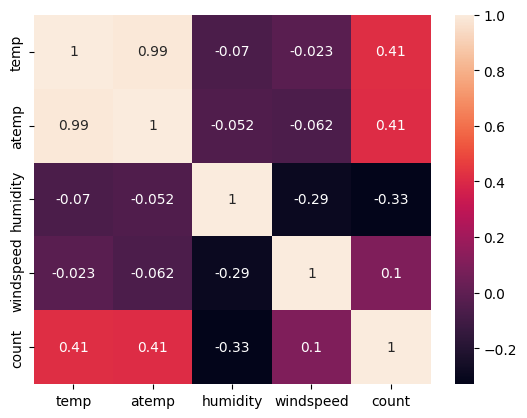

In [10]:
sns.heatmap(bikes_weather.corr(), annot=True)

### 5. Using that feature from step. 4, build a simple linear regression model with count as the response variable. Calculate R2.


In [15]:
# Building a linear regression model using one independent variable
model1 = sm.ols(formula='count ~ temp', data=bikes_weather).fit()

In [16]:
model1.rsquared

0.1719871643018619

### 6. Add an additional feature from the subset dataframe and repeat step 5. Observe how the value R2 changed. How can this change be explained ?

In [17]:
model2 = sm.ols(formula='count ~ temp + atemp', data=bikes_weather).fit()
model2.rsquared

0.17219441705303484

### 7. Add the remaining two features and repeat step 6. Does the model get better when atemp is added as a feature ? why ?

In [18]:
model3 = sm.ols(formula='count ~ temp + atemp + humidity + windspeed', data=bikes_weather).fit()
model3.rsquared

0.26626505184252525

### 8. What additional features can be added to improve the fit of the model ?

In [24]:
# adding 'hour' and 'year' to the model
# rsquared changes: 0.266 -> 0.360
model4 = sm.ols(formula='count ~ temp + atemp + humidity + windspeed + hour + year', data=bikes).fit()
model4.rsquared

0.36089909636389517

### BONUS

### 9. Use features that were extracted and binned in the datetime lesson to improve the r²r² score even further.

In [25]:
# adding month_name
# leads to a small enhancement!
# rsquared changes: 0.360 -> 0.393
model5 = sm.ols(formula='count ~ temp + atemp + humidity + windspeed + hour + year + month_name', data=bikes).fit()
model5.rsquared

0.3936775084599523

In [26]:
# adding day_of_week
# enhancement is not essential
# rsquared changes: 0.360 -> 0.363
model6 = sm.ols(formula='count ~ temp + atemp + humidity + windspeed + hour + year + day_of_week', data=bikes).fit()
model6.rsquared

0.3630109618543108

In [27]:
# adding part_of_day
# has the maximum influence on the model (among binned features)
# rsquared changes: 0.360 -> 0.501
model7 = sm.ols(formula='count ~ temp + atemp + humidity + windspeed + hour + year + part_of_day', data=bikes).fit()
model7.rsquared

0.5012838184100361

In [28]:
# adding all binned features
# rsquared changes: 0.360 -> 0.527
model8 = sm.ols(formula='count ~ temp + atemp + humidity + windspeed + hour + year + month_name + day_of_week + part_of_day', data=bikes).fit()
model8.rsquared

0.5273867703658861